# Plotting Notebook

In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

curr_dir = os.getcwd()

### Fourier Plotting

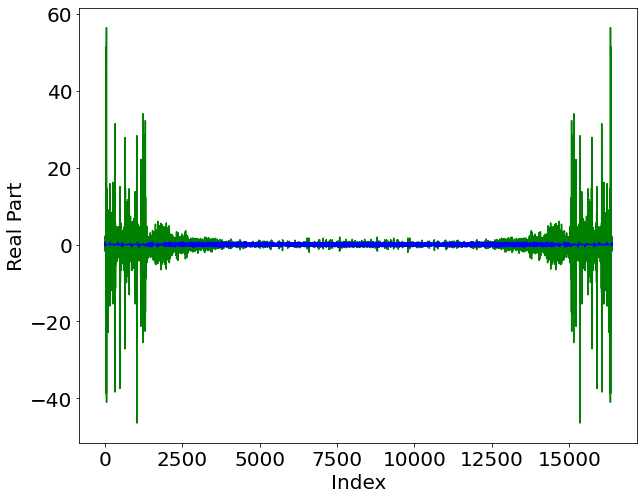

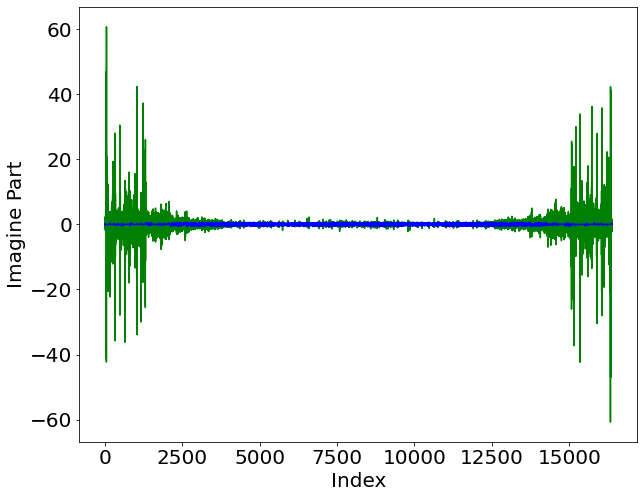

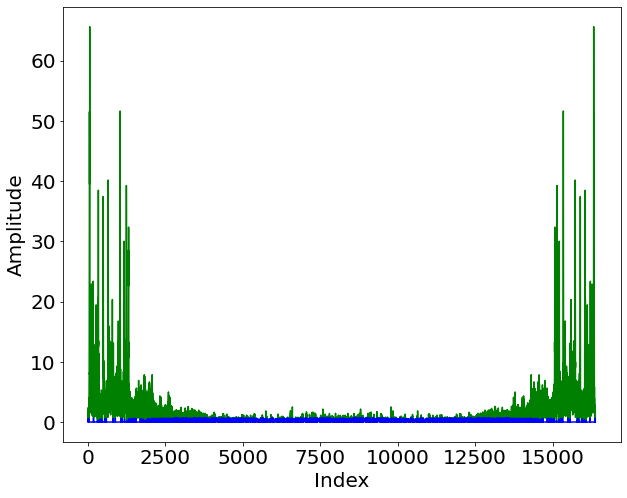

In [3]:
file_names = {"file_1": Path(curr_dir) / "output_data/frequency_filt_90.dat",
              "file_2": Path(curr_dir) / "output_data/frequency.dat"}
plots = {}
for key in file_names.keys():
    file = open(file_names[key], "r")
    index = []
    real_part = []
    imagine_part = []
    amplitude =[]
    for i, line in enumerate(file):
        if i > 0:
            index.append(int(line.split()[0]))
            real_part.append(float(line.split()[1]))
            imagine_part.append(float(line.split()[2]))
            amplitude.append(float(line.split()[3]))
    file.close()
    plots[key] = [np.array(index), np.array(real_part), np.array(imagine_part), np.array(amplitude)]
    
labels = {0: "Real Part", 1:"Imagine Part", 2:"Amplitude"}
for i in range(3):
    mpl.rcParams['font.size'] = 20
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    plt.plot(plots["file_1"][0],plots["file_2"][i+1], 'g')
    plt.plot(plots["file_1"][0],plots["file_2"][i+1] - plots["file_1"][i+1], 'b')
    plt.xlabel("Index")
    plt.ylabel(labels[i])
    plt.show()

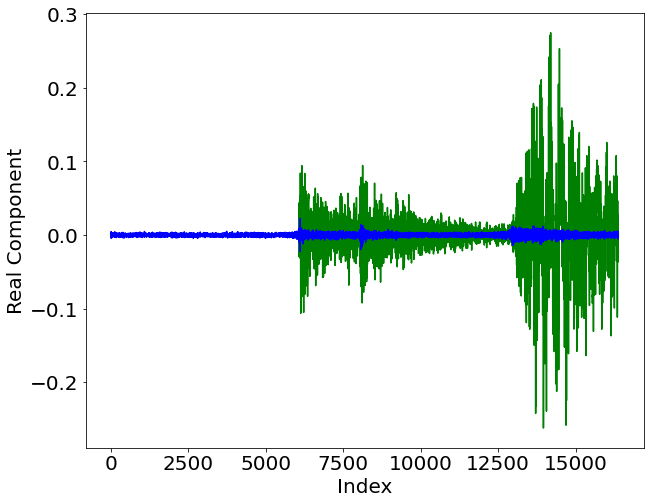

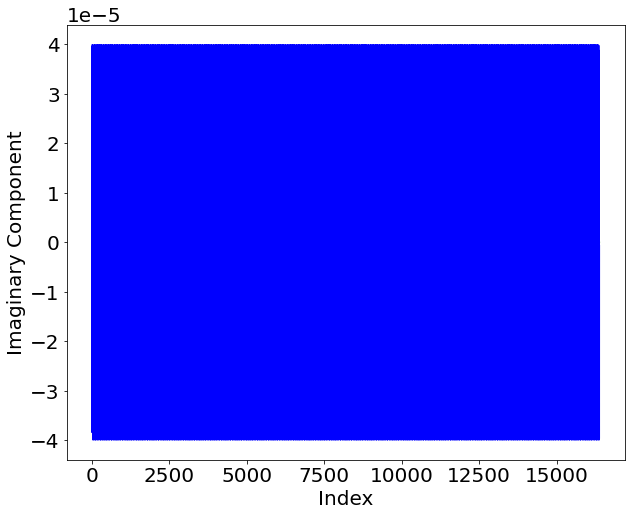

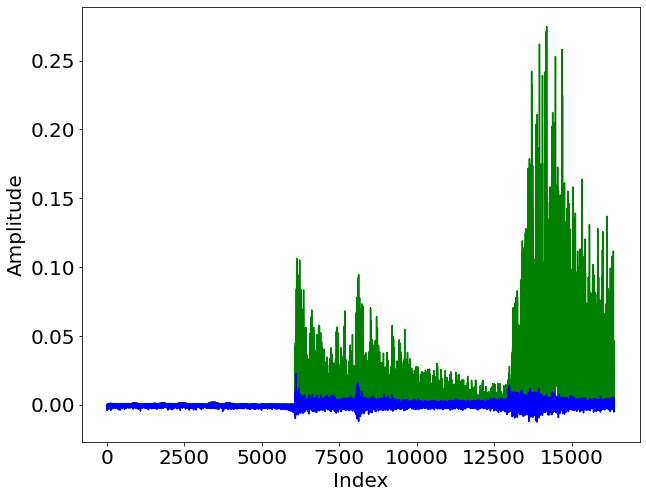

In [4]:
file_names = {"file_1": Path(curr_dir) / "output_data/signal_filt_90.dat",
              "file_2": Path(curr_dir) / "output_data/signal.dat"}
plots = {}
for key in file_names.keys():
    file = open(file_names[key], "r")
    index = []
    real_part = []
    imagine_part = []
    amplitude =[]
    for i, line in enumerate(file):
        if i>0:
            index.append(int(line.split()[0]))
            real_part.append(float(line.split()[1]))
            imagine_part.append(float(line.split()[2]))
            amplitude.append(float(line.split()[3]))
    file.close()
    plots[key] = [np.array(index), np.array(real_part), np.array(imagine_part), np.array(amplitude)]
labels = {0: "Real Component", 1:"Imaginary Component", 2:"Amplitude"}
for i in range(3):
    mpl.rcParams['font.size'] = 20
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    plt.plot(plots["file_1"][0],plots["file_2"][i+1], 'g')
    plt.plot(plots["file_1"][0],plots["file_2"][i+1] - plots["file_1"][i+1], 'b')
    plt.xlabel("Index")
    plt.ylabel(labels[i])
    plt.show()

### Time Domain Filtering

In [5]:
df_histo = pd.read_table(Path(curr_dir) / "output_data/intensity_histogram.dat", sep="\s+")
df_noise_removed_signal = pd.read_table(Path(curr_dir) / "output_data/noise_removed_signal.dat", sep="\s+")
df_original_signal = pd.read_table(Path(curr_dir) / "output_data/original_signal.dat", sep="\s+")

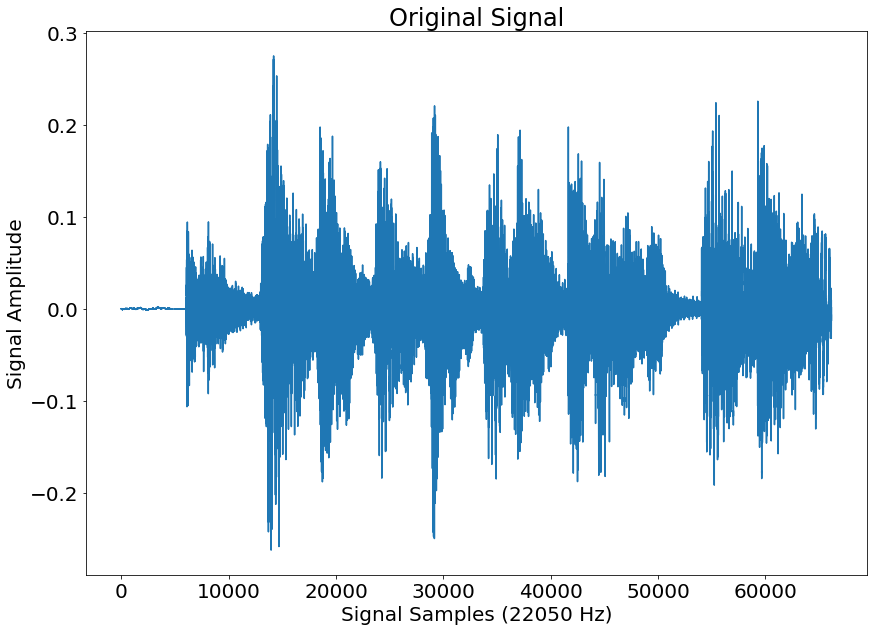

In [6]:
fig1 = plt.figure(figsize=(14, 10))
plt.xlabel("Signal Samples (22050 Hz)")
plt.ylabel("Signal Amplitude")
plt.title("Original Signal")
plt.plot(df_original_signal["index"], df_original_signal["signal_value"])

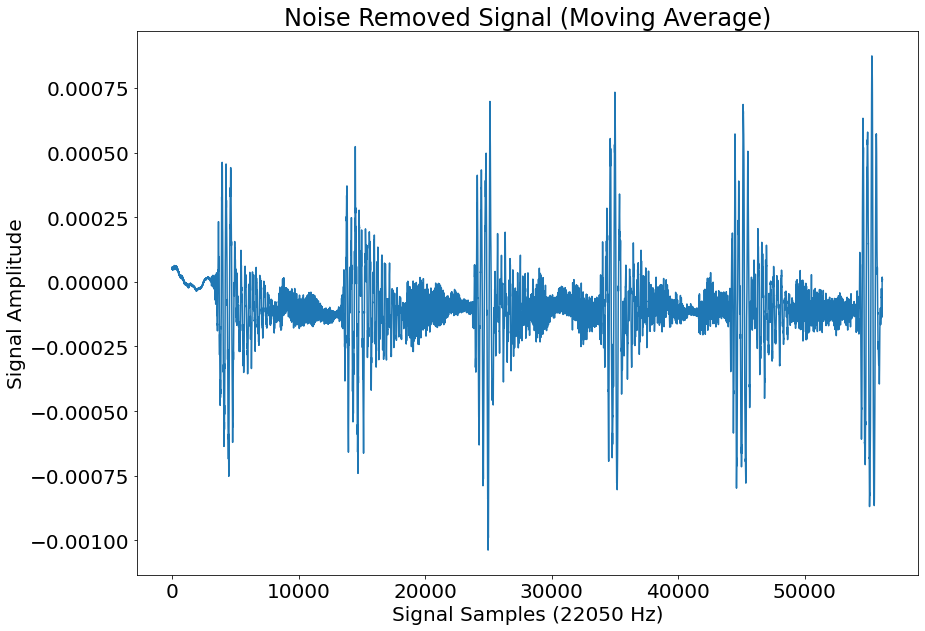

In [7]:
fig2 = plt.figure(figsize=(14, 10))
plt.xlabel("Signal Samples (22050 Hz)")
plt.ylabel("Signal Amplitude")
plt.title("Noise Removed Signal (Moving Average)") # window size = 10,000 samples
plt.plot(df_noise_removed_signal["index"], df_noise_removed_signal["signal_value"])

Text(0.5, 1.0, 'Noise Intensity Histogram')

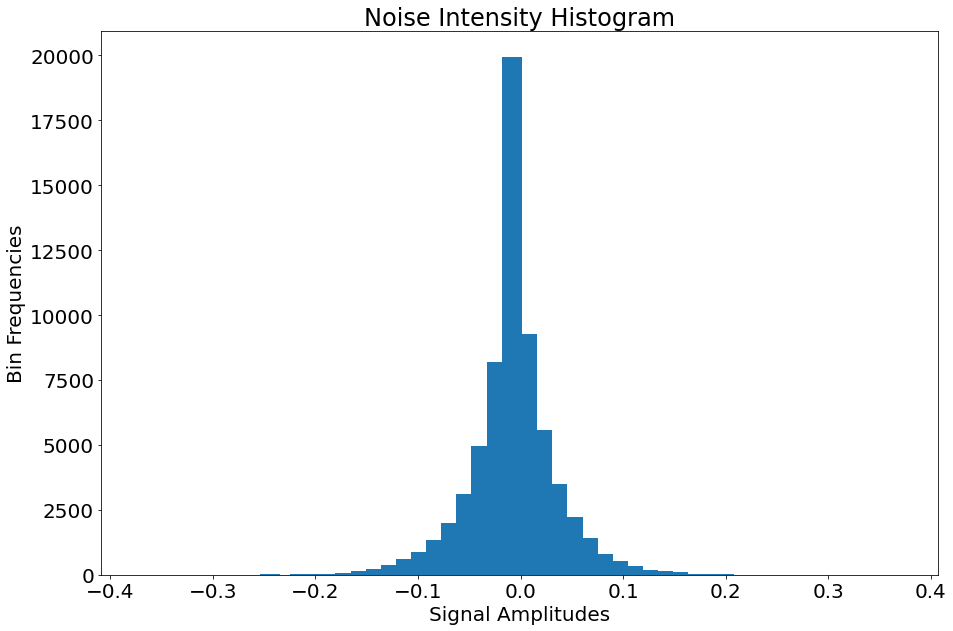

In [8]:
fig3 = plt.figure(figsize=(15, 10))
plt.bar(df_histo['bin_left'], df_histo['frequency'], width=0.02)
plt.ylabel("Bin Frequencies")
plt.xlabel("Signal Amplitudes")
plt.title("Noise Intensity Histogram")